In this notebook the angular size of the systematic is evaulated. Therefore, we compute the sqrt ts map of the standard anlysis and compute the 2D Fourier trafo of the first energybin. The obtained angular spectrum is compared with the one computed from a dataset consisting of statistical fluctuations only (asimov dataset). The spectrum of 1000 Poission draws of this asimov dataset are plotted and used for the standard deviation estimation of the anuglar spectrum points. 

In [1]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy
from gammapy.maps import Map
from gammapy.datasets import MapDataset
from gammapy.modeling.models import Models, Model, SkyModel, FoVBackgroundModel
from gammapy.estimators import ExcessMapEstimator
from gammapy.modeling import Fit, Parameter, Parameters

import astropy.units as u
import yaml
import sys
sys.path.append('/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/4-Fitting_nuisance_and_model_parameters')

import my_dataset_maps_19


In [2]:
source = "Crab"

import dataset and best fit model

In [3]:
dataset = MapDataset.read(f'{source}/stacked.fits')
models = Models.read(f'{source}/standard_model.yml')
dataset.models = models

computation of the sqrt ts map

In [4]:
def get_residual(estart, eend, dataset_1 , smooth):
    res_1 = dataset_1.slice_by_energy(estart*u.TeV, eend*u.TeV).residuals( 'diff/sqrt(model)')
    return res_1.smooth(smooth*u.deg).sum_over_axes()
def get_residual2(estart, eend, dataset_1 , smooth):
    dat_1 = dataset_1
    res_1 = dat_1.counts - dat_1.npred()
    res_1.data /= np.sqrt(dat_1.npred().data)
    return res_1.smooth(smooth*u.deg).slice_by_idx(dict(energy = slice(estart, eend))).sum_over_axes()

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)


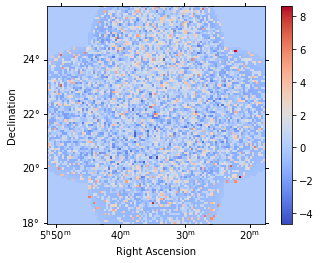

In [5]:
start, end =6,8
geom = dataset.geoms['geom']
result = get_residual2(start, end , dataset ,0.).cutout(geom.center_skydir, 8*u.deg)
result.plot(add_cbar = 1, cmap = 'coolwarm');

1000 Poission drawns of the Asimov dataset.

In [6]:
e_start, e_end = dataset.geoms['geom'].axes[0].edges[start],dataset.geoms['geom'].axes[0].edges[end]
observed  = result#.slice_by_idx(dict(energy=slice(start, end)))

N = 1000
res_stat_N = []
datasets_stat = dataset.copy()
datasets_stat.counts =  Map.from_geom(geom = datasets_stat.geoms['geom'])
for n in range(N):
    rng = np.random.RandomState()
    datasets_stat.counts.data = rng.poisson(datasets_stat.npred().data)
    
    result = get_residual2(start, end , datasets_stat ,0.).cutout(geom.center_skydir, 8*u.deg)
    res_stat_N.append(result)#["sqrt_ts"].slice_by_idx(dict(energy=slice(start, end))))

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)
/tmp/ipykernel_9788/2066791797.py:

In [7]:
datasetN_path2 = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/output/'
datasetN_path2 += '2022-03-22/'
datasetN_path2 += 'Crab_max_sysamplitude_48.7_downsampling_factor_25_statthreshold1_estart_0.3_eend_120.0/'

path = datasetN_path2
dataset_N_10 = my_dataset_maps_19.MapDatasetNuisance.read(path+ 'nui_dataset.fits')
with open(path+ 'nui_par.yml', "r") as ymlfile:
    nui_par = yaml.load(ymlfile, Loader=yaml.FullLoader)
dataset_N_10.N_parameters = Parameters.from_dict(nui_par )
with open(path+ 'nui_model.yml', "r") as ymlfile:
    best_fit_model = yaml.load(ymlfile, Loader=yaml.FullLoader)
with open(path+ 'nui_bgmodel.yml', "r") as ymlfile:
    best_fit_bgmodel = yaml.load(ymlfile, Loader=yaml.FullLoader)
bkg_model = FoVBackgroundModel(dataset_name=dataset_N_10.name)
bkg_model.parameters['norm'].value = best_fit_bgmodel['spectral']['parameters'][0]['value']
bkg_model.parameters['tilt'].value = best_fit_bgmodel['spectral']['parameters'][1]['value']
models = Models.from_dict(best_fit_model )
models.append(bkg_model)
dataset_N_10.models =models
print(dataset_N_10.models)

emask_map = dataset_N_10.background.geom.energy_mask(
                energy_min = 0.3*u.TeV,  energy_max =  120*u.TeV)
dataset_N_10.mask_fit = emask_map
dataset_N_10.mask_safe = emask_map



DatasetModels

Component 0: SkyModel

  Name                      : modelcrab
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude               :   4.05e-11   +/- 3.4e-13 1 / (cm2 s TeV)
    reference    (frozen)   :      1.000       TeV         
    alpha                   :      2.605   +/-    0.01             
    beta                    :      0.065   +/-    0.01             
    lon_0        (frozen)   :    184.557       deg         
    lat_0        (frozen)   :     -5.784       deg         
    sigma                   :      0.003   +/-    0.00 deg         
    e            (frozen)   :      0.000                   
    phi          (frozen)   :      0.000       deg         

Component 1: FoVBackgroundModel

  Name                      : MYf8HZOr-bkg
  Datasets names            : ['MYf8HZOr']
  Spectral model type       : PowerLawNor

<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

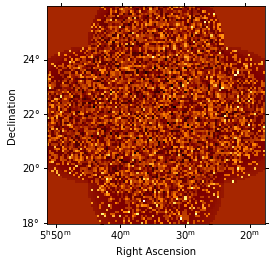

In [8]:
result.plot()

/tmp/ipykernel_9788/2066791797.py:7: RuntimeWarning: invalid value encountered in true_divide
  res_1.data /= np.sqrt(dat_1.npred().data)


<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

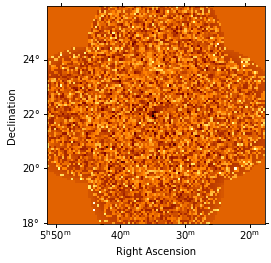

In [9]:
result_N = get_residual2(start, end , dataset_N_10 ,0.).cutout(geom.center_skydir, 8*u.deg)
result_N.plot()

Function used to compute the fourier tranfos of the observed residual and the statistical datasets

In [10]:
def plot_fourier (res_dataset_v0s, stats_res = None, labels_datasets = None):
    #image = mpimg.imread("clouds.png")
    for i,res_dataset_v0 in enumerate(res_dataset_v0s):
        image =res_dataset_v0[0].data
        npix = image.shape[1]
        kfreq = np.fft.fftfreq(npix) * npix
        kfreq2D = np.meshgrid(kfreq, kfreq)
        knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
        knrm = knrm.flatten()
        kbins = np.arange(0.5, npix//2+1, 1.)
        kvals = 0.5 * (kbins[1:] + kbins[:-1])
        print('knrm', len(knrm))
        Abinss = []
        if labels_datasets[i] == 'Standard':
            color = default_colors[1]
        else:
            color = default_colors[1:][i]
        for d in res_dataset_v0:
            image =d.data
            image = np.nan_to_num(image)
            fourier_image = np.fft.fftn(image)
            fourier_amplitudes = np.abs(fourier_image)**2

            fourier_amplitudes = fourier_amplitudes.flatten()
            Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                                 statistic = "mean",
                                                 bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals, Abins, '-',#alpha = 0.001963,
                       alpha = 0.02, color = color, label = '')
            Abinss.append(Abins)
        label = ''
        if labels_datasets is not None:
            label += labels_datasets[i]
        plt.errorbar(x = kvals,y =  np.mean(Abinss, axis = 0),
                     yerr = np.std(Abinss,axis = 0), fmt= 'x-', alpha = 0.9,  label = label ,
                    color = color)
    if stats_res is not None:
        Abinss = []
        for stats_re in stats_res:
            image =stats_re.data
            image = np.nan_to_num(image)

            fourier_image = np.fft.fftn(image)
            fourier_amplitudes = np.abs(fourier_image)**2
            fourier_amplitudes = fourier_amplitudes.flatten()
            Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                                 statistic = "mean",
                                                 bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals, Abins, '-',alpha = 0.005, color = 'black', label = '')
            Abinss.append(Abins)
        #plt.loglog(kvals, np.mean(Abinss, axis = 0), 'x-',alpha = 0.9, color = 'black' ,label = 'Stat')
        plt.errorbar(x = kvals,y =  np.mean(Abinss, axis = 0),
                     yerr = np.std(Abinss,axis = 0),
                     fmt = '-',alpha = 0.9, color = 'black' ,label = 'Stat')


    ax = plt.gca() ;    fig = plt.gcf() ;    ax2 = ax.twiny()
    labels = ['1', '2', '5', '10', '20','25']

    def tick_function(X):
        return ["%.2f$^\circ$" % (4./x) for x in X]
    ax2.set_xlim(ax.get_xlim())
    new_tick_locations = [1.,2.,5.,10.,20., 25.,]
    ax2.set_xticks(new_tick_locations) ;    ax2.set_xticklabels(tick_function(new_tick_locations))
    yy = ax.get_ylim()
    for i, data in enumerate(new_tick_locations):
        if i >-1:
            ax2.vlines(50/float(labels[::-1][i]), yy[0], yy[1], color = default_colors[:6][::-1][i],
                      alpha = 0.5)
    ax2.set_xscale('log') ;   ax2.set_xticks(new_tick_locations) ;ax2.set_xticklabels(tick_function(new_tick_locations))
    ax.set_xlabel("$k$") ;    ax2.set_xlabel("Angular Scale") ;    ax2.set_ylabel("Fourier Amplitude")
    ax.set_ylabel("$P(k)$") ;    plt.tight_layout();    plt.grid() ; 
    ax.legend(title= 'Stat+sys', loc = 'lower right')
    #plt.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")
    return fig

In [11]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Resulting plot

knrm 10000


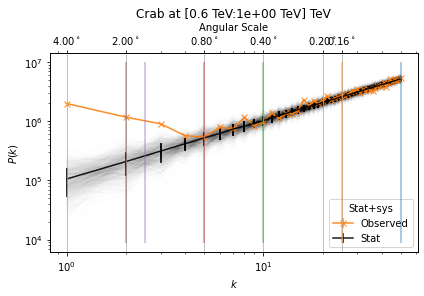

In [15]:
fig  = plot_fourier ([[observed]], res_stat_N, labels_datasets=['Observed'])
ax = plt.gca() ;ax.set_title("{} at [{:.1}:{:.1}] TeV".format(source, e_start, e_end));
fig = plt.gcf()
name = f'{source}'+'/plots/Angular_spectrum'  
fig.savefig(name+'.svg', dpi=300, bbox_inches = 'tight')
fig.savefig(name+'.pdf', dpi=300, bbox_inches = 'tight')
fig.savefig(name+'.png', dpi=300, bbox_inches = 'tight')




Interpretation:
- Diffraction pattern due to the edges visible in both the observed spectrum and stat 
- Deviation up to an angular scale of approx. 0.8 deg
- For this pariticular dataset the bisize of the nuisance parameters is recommendend in the same size. (downsampling : 10)

knrm 10000
knrm 10000


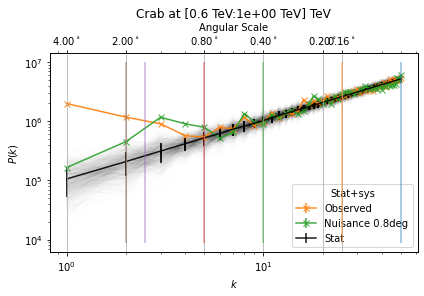

In [14]:
fig  = plot_fourier ([[observed],[result_N]], res_stat_N, labels_datasets=['Observed', "Nuisance 0.8deg"])
ax = plt.gca() ;ax.set_title("{} at [{:.1}:{:.1}] TeV".format(source, e_start, e_end));
fig = plt.gcf()
name = f'{source}'+'/plots/Angular_spectrum_N'  
fig.savefig(name+'.svg', dpi=300, bbox_inches = 'tight')
fig.savefig(name+'.pdf', dpi=300, bbox_inches = 'tight')
fig.savefig(name+'.png', dpi=300, bbox_inches = 'tight')




